In [1]:
import pandas as pd
import networkx as nx
print(nx.__version__)
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

from utils import *
from plot_utils import *
from metrics import *

import warnings
warnings.filterwarnings('ignore')

init_notebook_mode(connected=True)

2.5


# Load Dataset

In [2]:
data_download()

Download completed


In [3]:
#specifica country, base è italy
match_id2match, match_id2events, player_id2player, competition_id2competition, team_id2team = load_public_dataset(data_folder=data_folder, tournament = 'Italy')

In [4]:
match_id = 2576105 # a single match in Italy
match_events = match_id2events[match_id]
match_label = match_id2match[match_id]['label']
            
match_df = pd.DataFrame(match_events)

#prova un team
match_df1 = match_df[match_df['teamId'] == 3187]

match_df1['x_start'] = [x[0]['x'] for x in match_df1['positions']]
match_df1['y_start'] = [x[0]['y'] for x in match_df1['positions']]
match_df1.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,x_start,y_start
2,1,Ground loose ball duel,"[{'id': 702}, {'id': 1801}]",40726,"[{'y': 59, 'x': 28}, {'y': 54, 'x': 25}]",2576105,Duel,3187,1H,6.787307,13,210904066,28,59
4,1,Air duel,"[{'id': 703}, {'id': 1801}]",3300,"[{'y': 54, 'x': 25}, {'y': 69, 'x': 30}]",2576105,Duel,3187,1H,7.423298,10,210904067,25,54
9,1,Ground attacking duel,"[{'id': 701}, {'id': 1802}]",21385,"[{'y': 23, 'x': 35}, {'y': 27, 'x': 40}]",2576105,Duel,3187,1H,14.085138,11,210904070,35,23
17,1,Ground loose ball duel,"[{'id': 703}, {'id': 1801}]",25726,"[{'y': 39, 'x': 40}, {'y': 47, 'x': 45}]",2576105,Duel,3187,1H,34.051004,13,210904073,40,39
19,1,Ground attacking duel,"[{'id': 501}, {'id': 703}, {'id': 1801}]",25726,"[{'y': 47, 'x': 45}, {'y': 50, 'x': 45}]",2576105,Duel,3187,1H,35.541999,11,210904074,45,47


In [5]:
match_id = 2576105 # a single match in Italy
match_events = match_id2events[match_id]
match_label = match_id2match[match_id]['label']
            
match_df = pd.DataFrame(match_events)

#prova un team
match_df2 = match_df[match_df['teamId'] == 3159]

match_df2['x_start'] = [x[0]['x'] for x in match_df2['positions']]
match_df2['y_start'] = [x[0]['y'] for x in match_df2['positions']]
match_df2.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,x_start,y_start
0,8,Simple pass,[{'id': 1801}],89186,"[{'y': 49, 'x': 51}, {'y': 51, 'x': 30}]",2576105,Pass,3159,1H,1.306695,85,210903987,51,49
1,8,High pass,[{'id': 1801}],20461,"[{'y': 51, 'x': 30}, {'y': 41, 'x': 72}]",2576105,Pass,3159,1H,4.250663,83,210903988,30,51
3,1,Ground loose ball duel,"[{'id': 702}, {'id': 1801}]",25437,"[{'y': 41, 'x': 72}, {'y': 46, 'x': 75}]",2576105,Duel,3159,1H,7.329948,13,210903989,72,41
5,1,Air duel,"[{'id': 701}, {'id': 1802}]",0,"[{'y': 46, 'x': 75}, {'y': 31, 'x': 70}]",2576105,Duel,3159,1H,7.423298,10,210906034,75,46
6,8,Simple pass,[{'id': 1801}],3323,"[{'y': 31, 'x': 70}, {'y': 42, 'x': 69}]",2576105,Pass,3159,1H,9.752205,85,210903990,70,31


In [6]:
#DIZIONARIO player:posizione media tupla coordinate xy
avg_position = round(match_df1.groupby('playerId')['x_start','y_start'].mean(), 2)
avg_position['pos'] = list(zip(avg_position.x_start, avg_position.y_start)) 
avg_position.drop(['x_start', 'y_start'], axis = 1, inplace=True)
avg_position['playerId'] = avg_position.index
avg_position = dict(zip(avg_position.playerId, avg_position.pos))

In [7]:
avg = {}
for node, pos in avg_position.items():
    if node == 0:
        pass
    else:
        avg[player_id2player[node]['shortName'].encode('ascii', 'strict').decode('unicode-escape')] = pos

In [8]:
avg #NAPOLI

{'D. Mertens': (75.81, 48.48),
 'Albiol': (47.23, 66.62),
 'José Callejón': (73.24, 62.8),
 'Pepe Reina': (9.04, 38.6),
 'E. Hysaj': (58.99, 76.99),
 'M. Hamšík': (63.98, 36.44),
 'C. Maggio': (64.78, 88.9),
 'Jorginho': (57.97, 52.24),
 'L. Insigne': (72.36, 24.49),
 'Mário Rui': (66.6, 13.87),
 'K. Koulibaly': (47.95, 33.77),
 'Allan': (61.9, 70.47),
 'P. Zieliński': (68.09, 73.09),
 'A. Ounas': (78.44, 88.3)}

In [9]:
avg_position2 = round(match_df2.groupby('playerId')['x_start','y_start'].mean(), 2)
avg_position2['pos'] = list(zip(avg_position2.x_start, avg_position2.y_start)) 
avg_position2.drop(['x_start', 'y_start'], axis = 1, inplace=True)
avg_position2['playerId'] = avg_position2.index
avg_position2 = dict(zip(avg_position2.playerId, avg_position2.pos))

In [10]:
avg2 = {}
for node, pos in avg_position2.items():
    if node == 0:
        pass
    else:
        avg2[player_id2player[node]['shortName'].encode('ascii', 'strict').decode('unicode-escape')] = pos

In [11]:
avg2 #JUVE

{'S. Khedira': (38.89, 69.32),
 'G. Higuaín': (52.35, 49.3),
 'M. De Sciglio': (25.58, 83.39),
 'M. Pjanić': (39.88, 47.13),
 'G. Buffon': (48.02, 71.45),
 'A. Barzagli': (31.67, 78.33),
 'G. Chiellini': (24.97, 29.63),
 'C. Marchisio': (16.33, 54.33),
 'M. Benatia': (20.46, 65.8),
 'K. Asamoah': (32.79, 12.45),
 'J. Cuadrado': (44.0, 87.75),
 'B. Matuidi': (47.2, 18.04),
 'P. Dybala': (44.69, 51.02),
 'Douglas Costa': (46.06, 83.61)}

# Graph

In [12]:
def passing_networks(match_id=2576105):
    """
    Construct the passing networks of the teams in the match.
    
    Parameters
    ----------
    match_id : int, optional
        identifier of the match to plot
        
    Returns
    -------
    tuple
        the two constructed networks, as networkx objects.
    """
    
    # take the names of the two teams of the match
    match_label = match_id2match[match_id]['label']
    team1_name = match_label.split('-')[0].split(' ')[0]
    team2_name = match_label.split('-')[1].split(' ')[1].split(',')[0]
    
    # take all the events of the match
    match_events = []
    for event in match_id2events[match_id]:
        if event['eventName'] == 'Pass':
            match_events.append(event)

    match_events_df = pd.DataFrame(match_events)
    first_half_max_duration = np.max(match_events_df[match_events_df['matchPeriod'] == '1H']['eventSec'])

    # sum 1H time end to all the time in 2H
    for event in match_events:
        if event['matchPeriod'] == '2H':
            event['eventSec'] += first_half_max_duration
    
    team2pass2weight = defaultdict(lambda: defaultdict(int))
    send = []
    receive = []
    for event, next_event, next_next_event in zip(match_events, match_events[1:], match_events[2:]):
        try:
            if event['eventName'] == 'Pass' and ACCURATE_PASS in [tag['id'] for tag in event['tags']]:
                sender = player_id2player[event['playerId']]['shortName'].encode('ascii', 'strict').decode('unicode-escape')
                send.append(sender)
                # case of duel
                if next_event['eventName'] == 'Duel':
                    # if the next event of from a playero of the same tema
                    if next_event['teamId'] == event['teamId']:
                        receiver = player_id2player[next_event['playerId']]['shortName'].encode('ascii', 'strict').decode('unicode-escape')
                        team2pass2weight[team_id2team[event['teamId']]['name']][(sender, receiver)] += 1
                        receive.append(receive)
                    else:
                        receiver = player_id2player[next_next_event['playerId']]['shortName'].encode('ascii', 'strict').decode('unicode-escape')
                        team2pass2weight[team_id2team[event['teamId']]['name']][(sender, receiver)] += 1
                        receive.append(receive)
                else:  # any other event 
                    if next_event['teamId'] == event['teamId']:
                        receiver = player_id2player[next_event['playerId']]['shortName'].encode('ascii', 'strict').decode('unicode-escape')
                        team2pass2weight[team_id2team[event['teamId']]['name']][(sender, receiver)] += 1
                        receive.append(receive)
        except KeyError:
            pass
    # craete networkx graphs
    G1, G2 = nx.DiGraph(team=team1_name), nx.DiGraph(team=team2_name)
    for (sender, receiver), weight in team2pass2weight[team1_name].items():
        G1.add_edge(sender, receiver, weight=weight)
    for (sender, receiver), weight in team2pass2weight[team2_name].items():
        G2.add_edge(sender, receiver, weight=weight)    
    
    return G1, G2

In [13]:
G1, G2 = passing_networks(match_id=2576105)

In [14]:
#ASSEGNO AD OGNI NODO GIOCATORE LA POSIZIONE MEDIA
for node, pos in avg.items():
    G1.nodes[node]['pos'] = pos

In [26]:
for node, pos in avg2.items():
    G2.nodes[node]['pos'] = pos

In [27]:
nx.get_node_attributes(G2, 'pos')

{'P. Dybala': (44.69, 51.02),
 'G. Chiellini': (24.97, 29.63),
 'G. Higuaín': (52.35, 49.3),
 'M. Pjanić': (39.88, 47.13),
 'S. Khedira': (38.89, 69.32),
 'M. De Sciglio': (25.58, 83.39),
 'K. Asamoah': (32.79, 12.45),
 'M. Benatia': (20.46, 65.8),
 'G. Buffon': (48.02, 71.45),
 'Douglas Costa': (46.06, 83.61),
 'B. Matuidi': (47.2, 18.04),
 'C. Marchisio': (16.33, 54.33),
 'J. Cuadrado': (44.0, 87.75),
 'A. Barzagli': (31.67, 78.33)}

In [37]:
pos = [G2.nodes[node]['pos'] for node in G2.nodes()]

In [38]:
print(pos)

[(44.69, 51.02), (24.97, 29.63), (52.35, 49.3), (39.88, 47.13), (38.89, 69.32), (25.58, 83.39), (32.79, 12.45), (20.46, 65.8), (48.02, 71.45), (46.06, 83.61), (47.2, 18.04), (16.33, 54.33), (44.0, 87.75), (31.67, 78.33)]


In [53]:
for i in range(len(G2.nodes)):
    print(G2.nodes[list(G2.nodes)[i]]['pos'])

(44.69, 51.02)
(24.97, 29.63)
(52.35, 49.3)
(39.88, 47.13)
(38.89, 69.32)
(25.58, 83.39)
(32.79, 12.45)
(20.46, 65.8)
(48.02, 71.45)
(46.06, 83.61)
(47.2, 18.04)
(16.33, 54.33)
(44.0, 87.75)
(31.67, 78.33)


In [33]:
def plot_passing_networks(G1, G2):
    """
    Plot the two passing networks in input.
    
    Parameters
    ----------
    G1 : networkx object
        the object representing the first network
        
    G2 : networkx object
        the object representing the second network
    """
    fig, ax = pitch_graph_zone()
    
    #pos1 = nx.spring_layout(G1, 4)
    #pos2 = nx.spring_layout(G2, 4)
    nome2degree = dict(G1.degree)
    nx.draw(G1, pos = [G1.nodes[node]['pos'] for node in G1.nodes()], nodelist=list(nome2degree.keys()), 
            node_size=[deg * 50 for deg in nome2degree.values()], 
            node_color='red', edge_color='black',
            with_labels=True, font_weight='bold', alpha=0.75)
    plt.show()
    
    nome2degree = dict(G2.degree)
    nx.draw(G2, pos = [G2.nodes[node]['pos'] for node in G2.nodes()], nodelist=list(nome2degree.keys()), 
            node_size=[deg * 50 for deg in nome2degree.values()],
            node_color='blue', edge_color='black',
            with_labels=True, font_weight='bold', alpha=0.75)
    plt.show()

TypeError: list indices must be integers or slices, not str

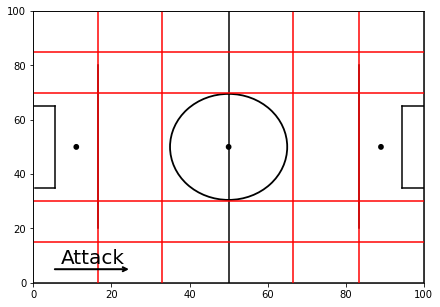

In [35]:
plot_passing_networks(G1, G2)